# Population Growth and its Impact on Human Development
**This data analysis project is a part of the Investigating a dataset exercise within Udacity Data Analyst program.*
<br>
<br>

**Abstract**: This data analysis report explores the relationship between population growth and the Human Development Index (HDI) using two datasets: population data and HDI data from 185 countries spanning the years 2005 to 2019. The datasets are sourced from Gapminder. The objective is to investigate whether countries experiencing significant population growth are able to achieve development on social factors and to identify any discernible link between population growth and HDI. By examining these questions, this report provides insights into the relationship between population growth and social development, shedding light on the potential implications of demographic changes on human development.

It is crucial to acknowledge that population growth is only one aspect that may affect development index. Other socio-economic and political factors also play significant roles. The findings will offer valuable insights into the implications of population growth on societal well-being, enabling policymakers and researchers to make more informed decisions regarding sustainable development strategies.

**Keywords**: population growth, Human Development Index (HDI), social development, data analysis, Gapminder
<br>
<br>

### Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
### Introduction

The world's population has been continuously growing, with significant variations across countries and regions. Simultaneously, human development, as measured by the HDI, has become an important indicator of a nation's progress in various social factors such as education, income, and health. Exploring the relationship between population growth and HDI can provide valuable insights into the interplay between demographic changes and social development.

This data analysis report focuses on investigating the relationship between population growth and HDI using two datasets collected from Gapminder. The first dataset contains population data for 185 countries from 2005 to 2019, while the second dataset consists of HDI data for the same set of countries and time span. By analyzing these datasets, we aim to address several research questions and uncover potential patterns or associations between population growth and social development. The following research questions are posed:

**Research question 1: What are the top 10 countries with the highest population growth over the years?**
The first research question examines the top 10 countries with the highest population growth over the years. Identifying these countries can provide insights into which nations have experienced the most significant demographic changes during the analyzed period.

**Research question 2: Which continent has the highest population growth?**
The second research question aims to determine the continent with the highest population growth. By analyzing the regional distribution of population growth, we can gain a better understanding of how demographic trends vary across different parts of the world.

**Research question 3: Does population growth have an impact on the Human Development Index (HDI)?**
Finally, the third research question delves into the potential impact of population growth on the HDI. By analyzing the relationship between these two factors, we can ascertain whether countries with substantial population growth have managed to achieve social development, as indicated by the HDI. This analysis can provide valuable insights into the complexities of social progress and inform policy and decision-making processes.

By addressing these research questions, this data analysis report seeks to contribute to the understanding of the relationship between population growth and social development. The findings can be useful for policymakers, researchers, and stakeholders involved in areas such as social planning, sustainable development, and population management.

**Data importing**

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
%matplotlib inline

In [332]:
df_pop = pd.read_csv('pop.csv')
df_hdi = pd.read_csv('hdi_human_development_index.csv')

<a id='wrangling'></a>
### Data Wrangling

**Inspecting the datasets**

In [333]:
df_pop.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [334]:
df_pop.shape

(197, 302)

In [335]:
columns_to_keep = ['country','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
df_pop.drop(df_pop.columns.difference(columns_to_keep), axis=1, inplace=True)
df_pop.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,24.4M,25.4M,25.9M,26.4M,27.4M,28.2M,29.2M,30.5M,31.5M,32.7M,33.8M,34.6M,35.6M,36.7M,37.8M
1,Angola,19.5M,20.2M,20.9M,21.7M,22.5M,23.4M,24.3M,25.2M,26.1M,27.1M,28.1M,29.2M,30.2M,31.3M,32.4M
2,Albania,3.03M,3M,2.98M,2.95M,2.93M,2.91M,2.9M,2.89M,2.89M,2.88M,2.88M,2.88M,2.88M,2.88M,2.87M
3,Andorra,79.8k,80.2k,78.2k,76.1k,73.9k,71.5k,70.6k,71k,71.4k,71.6k,71.7k,72.5k,73.8k,75k,76.3k
4,United Arab Emirates,4.28M,4.9M,5.87M,6.99M,7.99M,8.48M,8.58M,8.66M,8.75M,8.84M,8.92M,8.99M,9.07M,9.14M,9.21M


In [336]:
df_pop.shape

(197, 16)

In [337]:
df_hdi.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
2,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,United Arab Emirates,0.723,0.735,0.738,0.745,0.755,0.764,0.765,0.766,0.769,...,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890


In [338]:
df_hdi.shape

(189, 31)

In [339]:
df_hdi.drop(df_hdi.columns.difference(columns_to_keep), axis=1, inplace=True)
df_hdi.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.418,0.429,0.447,0.447,0.460,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,0.460,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
2,Albania,0.706,0.713,0.722,0.728,0.733,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
3,Andorra,0.827,0.837,0.837,0.840,0.839,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,United Arab Emirates,0.809,0.814,0.819,0.821,0.819,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890


In [340]:
df_hdi.shape

(189, 16)

In [341]:
df_pop.columns == df_hdi.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

**Cleaning the datasets**

In [342]:
df_pop.isnull().sum()

country    0
2005       1
2006       1
2007       1
2008       1
2009       1
2010       1
2011       1
2012       1
2013       1
2014       1
2015       1
2016       1
2017       1
2018       1
2019       1
dtype: int64

In [343]:
df_hdi.isnull().sum()

country    0
2005       4
2006       3
2007       3
2008       3
2009       3
2010       1
2011       1
2012       1
2013       1
2014       1
2015       1
2016       1
2017       0
2018       0
2019       0
dtype: int64

In [344]:
df_pop.dropna(inplace=True)
df_hdi.dropna(inplace=True)

In [345]:
df_pop.isnull().sum().any()

False

In [346]:
df_hdi.isnull().sum().any()

False

In [347]:
print(df_pop.duplicated().sum())
print(df_hdi.duplicated().sum())

0
0


In [348]:
df_pop.dtypes

country    object
2005       object
2006       object
2007       object
2008       object
2009       object
2010       object
2011       object
2012       object
2013       object
2014       object
2015       object
2016       object
2017       object
2018       object
2019       object
dtype: object

In [349]:
columns_to_convert = df_pop.columns[df_pop.columns != 'country']

pattern = r'(\d+(\.\d+)?)'
multipliers = {'K': 1e3, 'M': 1e6, 'B': 1e9}

for column in columns_to_convert:
    df_pop[column] = df_pop[column].apply(lambda x: float(re.findall(pattern, str(x))[0][0]))
    df_pop[column + '_multiplier'] = df_pop[column].apply(lambda x: ''.join(re.findall(r'[KMB]', str(x))))
    df_pop[column] = df_pop[column] * df_pop[column + '_multiplier'].map(multipliers).fillna(1)
    df_pop = df_pop.drop(columns=[column + '_multiplier'])
    
df_pop.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,24.40,25.4,25.90,26.40,27.40,28.20,29.20,30.50,31.50,32.70,33.80,34.60,35.60,36.70,37.80
1,Angola,19.50,20.2,20.90,21.70,22.50,23.40,24.30,25.20,26.10,27.10,28.10,29.20,30.20,31.30,32.40
2,Albania,3.03,3.0,2.98,2.95,2.93,2.91,2.90,2.89,2.89,2.88,2.88,2.88,2.88,2.88,2.87
3,Andorra,79.80,80.2,78.20,76.10,73.90,71.50,70.60,71.00,71.40,71.60,71.70,72.50,73.80,75.00,76.30
4,United Arab Emirates,4.28,4.9,5.87,6.99,7.99,8.48,8.58,8.66,8.75,8.84,8.92,8.99,9.07,9.14,9.21


In [350]:
df_pop.dtypes

country     object
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
dtype: object

In [351]:
df_hdi.dtypes

country     object
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
dtype: object

In [352]:
df_pop.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,24.40,25.4,25.90,26.40,27.40,28.20,29.20,30.50,31.50,32.70,33.80,34.60,35.60,36.70,37.80
1,Angola,19.50,20.2,20.90,21.70,22.50,23.40,24.30,25.20,26.10,27.10,28.10,29.20,30.20,31.30,32.40
2,Albania,3.03,3.0,2.98,2.95,2.93,2.91,2.90,2.89,2.89,2.88,2.88,2.88,2.88,2.88,2.87
3,Andorra,79.80,80.2,78.20,76.10,73.90,71.50,70.60,71.00,71.40,71.60,71.70,72.50,73.80,75.00,76.30
4,United Arab Emirates,4.28,4.9,5.87,6.99,7.99,8.48,8.58,8.66,8.75,8.84,8.92,8.99,9.07,9.14,9.21


In [353]:
df_hdi.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.418,0.429,0.447,0.447,0.460,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,0.460,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
2,Albania,0.706,0.713,0.722,0.728,0.733,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
3,Andorra,0.827,0.837,0.837,0.840,0.839,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,United Arab Emirates,0.809,0.814,0.819,0.821,0.819,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890


In [354]:
df_pop.shape

(196, 16)

In [355]:
df_hdi.shape

(185, 16)

In [356]:
countries = df_hdi['country'].unique()
df_pop = df_pop[df_pop['country'].isin(countries)]
df_pop.shape

(185, 16)

<a id='eda'></a>
### Exploratory Data Analysis

**Research question 1: What are the top 10 countries with the highest population growth over the years?**

In [357]:
df_pop['pop_growth'] = df_pop[['2005', '2019']].pct_change(axis=1)['2019']* 100
df_pop.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,pop_growth
0,Afghanistan,24.40,25.4,25.90,26.40,27.40,28.20,29.20,30.50,31.50,32.70,33.80,34.60,35.60,36.70,37.80,54.918033
1,Angola,19.50,20.2,20.90,21.70,22.50,23.40,24.30,25.20,26.10,27.10,28.10,29.20,30.20,31.30,32.40,66.153846
2,Albania,3.03,3.0,2.98,2.95,2.93,2.91,2.90,2.89,2.89,2.88,2.88,2.88,2.88,2.88,2.87,-5.280528
3,Andorra,79.80,80.2,78.20,76.10,73.90,71.50,70.60,71.00,71.40,71.60,71.70,72.50,73.80,75.00,76.30,-4.385965
4,United Arab Emirates,4.28,4.9,5.87,6.99,7.99,8.48,8.58,8.66,8.75,8.84,8.92,8.99,9.07,9.14,9.21,115.186916


In [358]:
columns_to_keep = ['country','pop_growth']
df_pop.drop(df_pop.columns.difference(columns_to_keep), axis=1, inplace=True)
df_pop.head()

,country,pop_growth
0,Afghanistan,54.918033
1,Angola,66.153846
2,Albania,-5.280528
3,Andorra,-4.385965
4,United Arab Emirates,115.186916


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

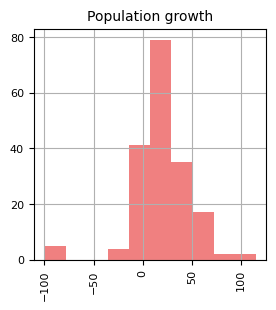

In [359]:
df_pop.hist(figsize=(3,3),color='lightcoral')

plt.title('Population growth', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

In [360]:
df_top_ten = df_pop.reset_index().sort_values(by='pop_growth', ascending=False)[:9]
df_top_ten

,index,country,pop_growth
4,4,United Arab Emirates,115.186916
95,96,Kuwait,98.214286
86,87,Jordan,88.380282
130,135,Oman,82.539683
123,127,Niger,68.345324
1,1,Angola,66.153846
110,112,Maldives,64.495114
11,11,Burundi,61.028417
161,170,Chad,61.000000


(array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

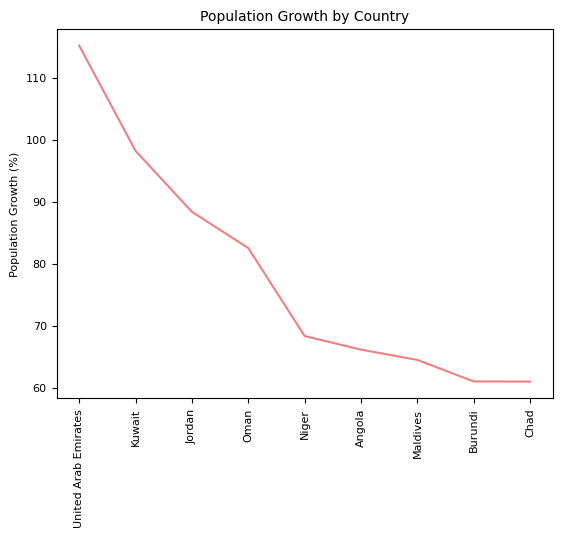

In [415]:
plt.plot(df_top_ten['country'],df_top_ten['pop_growth'], color='lightcoral')

plt.title('Population Growth by Country', fontsize=10)
plt.ylabel('Population Growth (%)', fontsize=8)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

**Research question 2: Which continent has the highest population growth?**

In [362]:
df_continent = pd.read_csv('all.csv')
df_continent = df_continent.loc[:, ['name', 'region']]
df_continent.head()

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [363]:
df_pop = pd.merge(df_pop, df_continent, how='inner', left_on='country', right_on='name').drop('name', axis=1)
df_pop.head()

,country,pop_growth,region
0,Afghanistan,54.918033,Asia
1,Angola,66.153846,Africa
2,Albania,-5.280528,Europe
3,Andorra,-4.385965,Europe
4,United Arab Emirates,115.186916,Asia


In [364]:
continent_growth = df_pop.groupby('region').mean().pop_growth
continent_growth

region
Africa      33.483732
Americas    16.148273
Asia        21.175463
Europe       3.105437
Oceania     20.491685
Name: pop_growth, dtype: float64

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

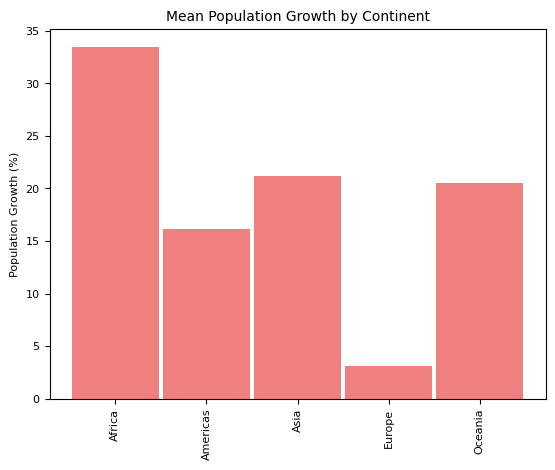

In [413]:
continents = ['Africa','Americas','Asia','Europe','Oceania']

plt.bar(continents, continent_growth, color='lightcoral', width=.95)

plt.title('Mean Population Growth by Continent', fontsize=10)
plt.ylabel('Population Growth (%)', fontsize=8)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

(array([-150., -100.,  -50.,    0.,   50.,  100.,  150.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

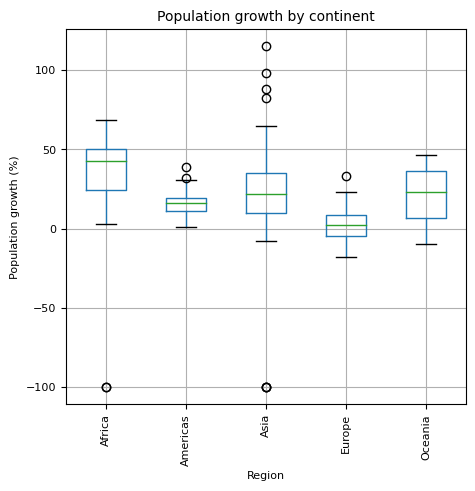

In [366]:
df_pop.boxplot(by='region', rot=90, figsize=(5,5))

plt.title('Population growth by continent', fontsize=10)
plt.suptitle("")

plt.xlabel('Region', fontsize=8)
plt.ylabel('Population growth (%)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

**Research question 3: Does population growth have an impact on the Human Development Index (HDI)?**

In [367]:
df_hdi_growth = df_hdi.copy()
df_hdi_growth['hdi_change'] = df_hdi_growth[['2005', '2019']].pct_change(axis=1)['2019']* 100
df_hdi_growth.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,hdi_change
0,Afghanistan,0.418,0.429,0.447,0.447,0.460,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511,22.248804
1,Angola,0.460,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581,26.304348
2,Albania,0.706,0.713,0.722,0.728,0.733,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795,12.606232
3,Andorra,0.827,0.837,0.837,0.840,0.839,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868,4.957678
4,United Arab Emirates,0.809,0.814,0.819,0.821,0.819,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890,10.012361


In [368]:
columns_to_keep_hdi = ['country','hdi_change']
df_hdi_growth.drop(df_hdi_growth.columns.difference(columns_to_keep_hdi), axis=1, inplace=True)
df_hdi_growth.head()

,country,hdi_change
0,Afghanistan,22.248804
1,Angola,26.304348
2,Albania,12.606232
3,Andorra,4.957678
4,United Arab Emirates,10.012361


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

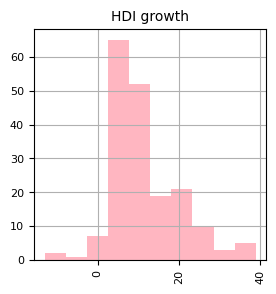

In [369]:
df_hdi_growth.hist(figsize=(3,3),color='lightpink')

plt.title('HDI growth', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

In [370]:
df_region = pd.merge(df_pop, df_hdi_growth, how='inner', left_on='country', right_on='country').drop('country', axis=1)
df_region

,pop_growth,region,hdi_change
0,54.918033,Asia,22.248804
1,66.153846,Africa,26.304348
2,-5.280528,Europe,12.606232
3,-4.385965,Europe,4.957678
4,115.186916,Asia,10.012361
...,...,...,...
154,12.169312,Oceania,5.612999
155,47.887324,Asia,-2.691511
156,18.571429,Africa,13.987138
157,58.620690,Africa,23.991507


In [371]:
hdi_change = df_region.groupby('region').mean().hdi_change
hdi_change

region
Africa      19.323847
Americas     7.442222
Asia        11.791076
Europe       6.233363
Oceania      7.275970
Name: hdi_change, dtype: float64

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

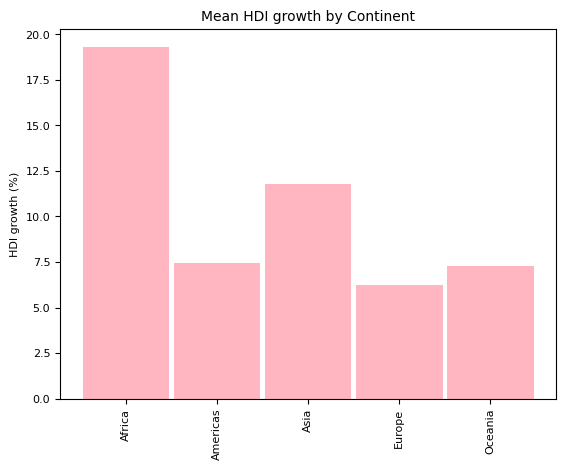

In [412]:
continents = ['Africa','Americas','Asia','Europe','Oceania']

plt.bar(continents, hdi_change, color='lightpink', width=.95)

plt.title('Mean HDI growth by Continent', fontsize=10)
plt.ylabel('HDI growth (%)', fontsize=8)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

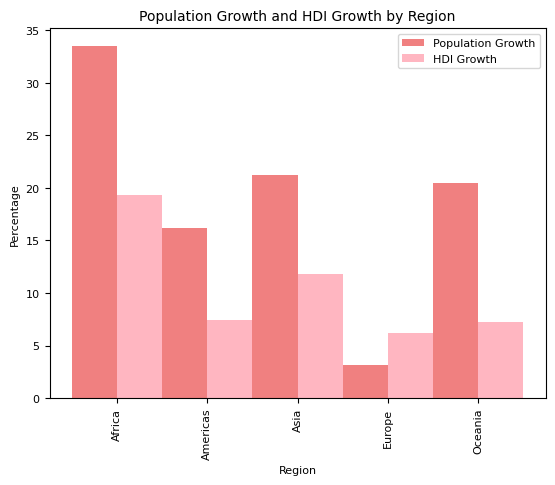

In [406]:
grouped_data = df_region.groupby('region').mean()

regions = grouped_data.index
x = range(len(regions))
bar_width = 0.5

plt.bar(x, grouped_data['pop_growth'], width=bar_width, label='Population Growth', color='lightcoral')
plt.bar([i + bar_width for i in x], grouped_data['hdi_change'], width=bar_width, label='HDI Growth', color='lightpink')

plt.xticks([i + bar_width/2 for i in x], regions)

plt.xlabel('Region', fontsize=8)
plt.ylabel('Percentage', fontsize=8)
plt.title('Population Growth and HDI Growth by Region', fontsize=10)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

In [374]:
df_top_ten = pd.merge(df_top_ten, df_hdi_growth, how='inner', left_on='country', right_on='country')
df_top_ten

,index,country,pop_growth,hdi_change
0,4,United Arab Emirates,115.186916,10.012361
1,96,Kuwait,98.214286,2.937420
2,87,Jordan,88.380282,-1.219512
3,135,Oman,82.539683,10.461957
4,127,Niger,68.345324,34.013605
5,1,Angola,66.153846,26.304348
6,112,Maldives,64.495114,14.728682
7,11,Burundi,61.028417,28.486647
8,170,Chad,61.000000,21.712538


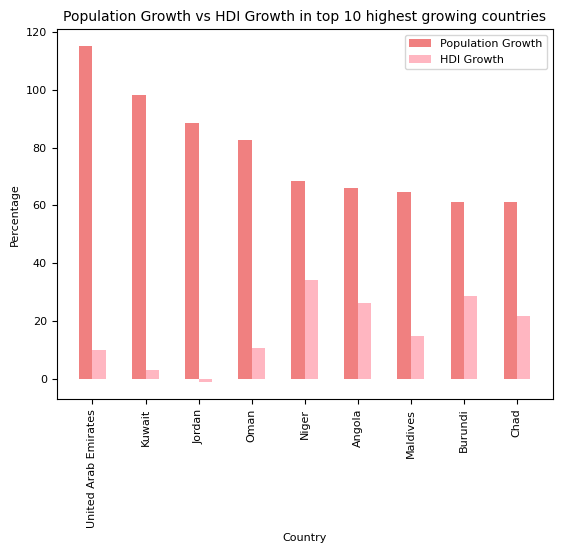

In [423]:
x = range(len(df_top_ten['country']))
bar_width = 0.25

plt.bar(x, df_top_ten['pop_growth'], width=bar_width, label='Population Growth', color='lightcoral')
plt.bar([i + bar_width for i in x], df_top_ten['hdi_change'], width=bar_width, label='HDI Growth', color='lightpink')

plt.xticks([i + bar_width/2 for i in x], df_top_ten['country'])

plt.xlabel('Country', fontsize=8)
plt.ylabel('Percentage', fontsize=8)
plt.title('Population Growth vs HDI Growth in top 10 highest growing countries', fontsize=10)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

In [376]:
df_top_ten = pd.merge(df_top_ten, df_hdi, how='inner', left_on='country', right_on='country')
df_top_ten

,index,country,pop_growth,hdi_change,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,United Arab Emirates,115.186916,10.012361,0.809,0.814,0.819,0.821,0.819,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890
1,96,Kuwait,98.214286,2.937420,0.783,0.788,0.788,0.790,0.789,0.788,0.792,0.796,0.793,0.796,0.801,0.804,0.805,0.807,0.806
2,87,Jordan,88.380282,-1.219512,0.738,0.741,0.744,0.745,0.743,0.737,0.734,0.735,0.729,0.729,0.730,0.729,0.726,0.728,0.729
3,135,Oman,82.539683,10.461957,0.736,0.740,0.752,0.770,0.777,0.782,0.782,0.791,0.799,0.802,0.814,0.815,0.819,0.813,0.813
4,127,Niger,68.345324,34.013605,0.294,0.300,0.306,0.314,0.321,0.331,0.338,0.350,0.357,0.365,0.372,0.378,0.386,0.391,0.394
5,1,Angola,66.153846,26.304348,0.460,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
6,112,Maldives,64.495114,14.728682,0.645,0.659,0.664,0.673,0.674,0.685,0.697,0.704,0.709,0.718,0.724,0.728,0.731,0.734,0.740
7,11,Burundi,61.028417,28.486647,0.337,0.359,0.371,0.384,0.401,0.411,0.419,0.426,0.432,0.438,0.437,0.438,0.434,0.431,0.433
8,170,Chad,61.000000,21.712538,0.327,0.330,0.340,0.346,0.361,0.369,0.380,0.388,0.394,0.401,0.398,0.393,0.396,0.397,0.398


In [377]:
columns_hdi = ['country','pop_growth','hdi_change','2005','2019']
df_top_ten.drop(df_top_ten.columns.difference(columns_hdi), axis=1, inplace=True)
df_top_ten

,country,pop_growth,hdi_change,2005,2019
0,United Arab Emirates,115.186916,10.012361,0.809,0.890
1,Kuwait,98.214286,2.937420,0.783,0.806
2,Jordan,88.380282,-1.219512,0.738,0.729
3,Oman,82.539683,10.461957,0.736,0.813
4,Niger,68.345324,34.013605,0.294,0.394
5,Angola,66.153846,26.304348,0.460,0.581
6,Maldives,64.495114,14.728682,0.645,0.740
7,Burundi,61.028417,28.486647,0.337,0.433
8,Chad,61.000000,21.712538,0.327,0.398


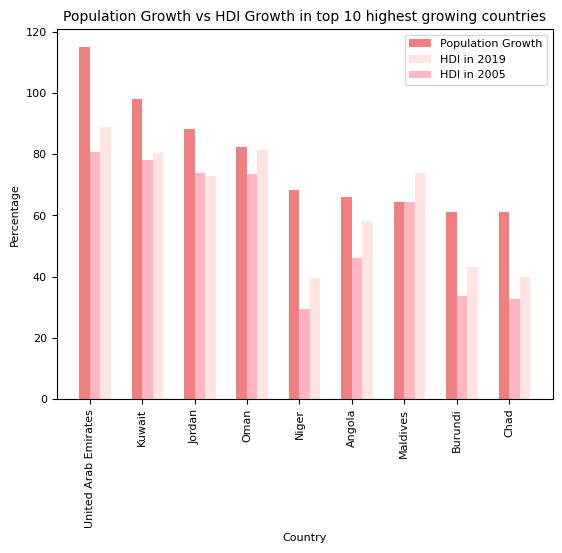

In [426]:
x = range(len(df_top_ten['country']))
bar_width = 0.2

plt.bar(x, df_top_ten['pop_growth'], width=bar_width, label='Population Growth', color='lightcoral')
plt.bar([i + bar_width*2 for i in x], df_top_ten['2019']*100, width=bar_width, label='HDI in 2019', color='mistyrose')
plt.bar([i + bar_width for i in x], df_top_ten['2005']*100, width=bar_width, label='HDI in 2005', color='lightpink')

plt.xticks([i + bar_width/2 for i in x], df_top_ten['country'])

plt.xlabel('Country', fontsize=8)
plt.ylabel('Percentage', fontsize=8)
plt.title('Population Growth vs HDI Growth in top 10 highest growing countries', fontsize=10)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

In [379]:
df_hdi.mean()

G:\anaconda\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


2005    0.659032
2006    0.665892
2007    0.672768
2008    0.678968
2009    0.682789
2010    0.688189
2011    0.693627
2012    0.698811
2013    0.703638
2014    0.707805
2015    0.711573
2016    0.714459
2017    0.717968
2018    0.720562
2019    0.723551
dtype: float64

In [380]:
df_hdi.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.659032,0.665892,0.672768,0.678968,0.682789,0.688189,0.693627,0.698811,0.703638,0.707805,0.711573,0.714459,0.717968,0.720562,0.723551
std,0.165277,0.164128,0.162789,0.161119,0.158052,0.156278,0.154919,0.153237,0.152435,0.151675,0.151440,0.151305,0.150495,0.150273,0.149682
min,0.294000,0.300000,0.306000,0.314000,0.321000,0.331000,0.338000,0.350000,0.357000,0.365000,0.372000,0.378000,0.386000,0.391000,0.394000
25%,0.512000,0.519000,0.527000,0.532000,0.543000,0.552000,0.565000,0.573000,0.579000,0.579000,0.587000,0.588000,0.595000,0.599000,0.602000
50%,0.689000,0.698000,0.706000,0.714000,0.718000,0.721000,0.727000,0.729000,0.729000,0.733000,0.738000,0.738000,0.740000,0.738000,0.742000
75%,0.791000,0.797000,0.800000,0.803000,0.803000,0.805000,0.806000,0.808000,0.821000,0.825000,0.838000,0.839000,0.838000,0.836000,0.838000
max,0.931000,0.934000,0.936000,0.937000,0.937000,0.941000,0.942000,0.944000,0.946000,0.944000,0.947000,0.950000,0.954000,0.956000,0.957000


In [381]:
high_hdi = df_hdi.reset_index().sort_values(by='2019', ascending=False)[:9]
high_hdi

,index,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
127,129,Norway,0.931,0.934,0.936,0.937,0.937,0.940,0.942,0.941,0.944,0.944,0.947,0.950,0.954,0.956,0.957
30,30,Switzerland,0.914,0.920,0.923,0.925,0.935,0.941,0.941,0.944,0.946,0.942,0.947,0.947,0.949,0.955,0.955
79,79,Ireland,0.904,0.906,0.909,0.911,0.906,0.901,0.902,0.908,0.917,0.928,0.935,0.943,0.947,0.951,0.955
82,82,Iceland,0.896,0.899,0.905,0.899,0.898,0.898,0.907,0.915,0.927,0.931,0.934,0.941,0.943,0.946,0.949
72,72,"Hong Kong, China",0.874,0.886,0.890,0.899,0.901,0.904,0.907,0.914,0.918,0.926,0.930,0.936,0.941,0.946,0.949
44,44,Germany,0.908,0.918,0.921,0.924,0.924,0.927,0.933,0.934,0.935,0.937,0.938,0.941,0.943,0.946,0.947
157,160,Sweden,0.904,0.908,0.910,0.907,0.905,0.911,0.912,0.914,0.933,0.935,0.938,0.940,0.942,0.943,0.945
8,8,Australia,0.906,0.909,0.912,0.926,0.928,0.930,0.932,0.937,0.931,0.933,0.938,0.939,0.941,0.943,0.944
126,128,Netherlands,0.897,0.903,0.910,0.913,0.912,0.917,0.928,0.928,0.930,0.932,0.934,0.936,0.939,0.942,0.944


In [385]:
high_hdi = pd.merge(high_hdi, df_pop, how='left', left_on='country', right_on='country')
high_hdi

,index,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,pop_growth,region
0,129,Norway,0.931,0.934,0.936,0.937,0.937,0.940,0.942,0.941,0.944,0.944,0.947,0.950,0.954,0.956,0.957,15.800866,Europe
1,30,Switzerland,0.914,0.920,0.923,0.925,0.935,0.941,0.941,0.944,0.946,0.942,0.947,0.947,0.949,0.955,0.955,15.477793,Europe
2,79,Ireland,0.904,0.906,0.909,0.911,0.906,0.901,0.902,0.908,0.917,0.928,0.935,0.943,0.947,0.951,0.955,18.932039,Europe
3,82,Iceland,0.896,0.899,0.905,0.899,0.898,0.898,0.907,0.915,0.927,0.931,0.934,0.941,0.943,0.946,0.949,21.548822,Europe
4,72,"Hong Kong, China",0.874,0.886,0.890,0.899,0.901,0.904,0.907,0.914,0.918,0.926,0.930,0.936,0.941,0.946,0.949,NaN,NaN
5,44,Germany,0.908,0.918,0.921,0.924,0.924,0.927,0.933,0.934,0.935,0.937,0.938,0.941,0.943,0.946,0.947,2.339901,Europe
6,160,Sweden,0.904,0.908,0.910,0.907,0.905,0.911,0.912,0.914,0.933,0.935,0.938,0.940,0.942,0.943,0.945,13.812155,Europe
7,8,Australia,0.906,0.909,0.912,0.926,0.928,0.930,0.932,0.937,0.931,0.933,0.938,0.939,0.941,0.943,0.944,25.742574,Oceania
8,128,Netherlands,0.897,0.903,0.910,0.913,0.912,0.917,0.928,0.928,0.930,0.932,0.934,0.936,0.939,0.942,0.944,6.748466,Europe


In [389]:
high_hdi.drop(4)

,index,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,pop_growth,region
0,129,Norway,0.931,0.934,0.936,0.937,0.937,0.940,0.942,0.941,0.944,0.944,0.947,0.950,0.954,0.956,0.957,15.800866,Europe
1,30,Switzerland,0.914,0.920,0.923,0.925,0.935,0.941,0.941,0.944,0.946,0.942,0.947,0.947,0.949,0.955,0.955,15.477793,Europe
2,79,Ireland,0.904,0.906,0.909,0.911,0.906,0.901,0.902,0.908,0.917,0.928,0.935,0.943,0.947,0.951,0.955,18.932039,Europe
3,82,Iceland,0.896,0.899,0.905,0.899,0.898,0.898,0.907,0.915,0.927,0.931,0.934,0.941,0.943,0.946,0.949,21.548822,Europe
5,44,Germany,0.908,0.918,0.921,0.924,0.924,0.927,0.933,0.934,0.935,0.937,0.938,0.941,0.943,0.946,0.947,2.339901,Europe
6,160,Sweden,0.904,0.908,0.910,0.907,0.905,0.911,0.912,0.914,0.933,0.935,0.938,0.940,0.942,0.943,0.945,13.812155,Europe
7,8,Australia,0.906,0.909,0.912,0.926,0.928,0.930,0.932,0.937,0.931,0.933,0.938,0.939,0.941,0.943,0.944,25.742574,Oceania
8,128,Netherlands,0.897,0.903,0.910,0.913,0.912,0.917,0.928,0.928,0.930,0.932,0.934,0.936,0.939,0.942,0.944,6.748466,Europe


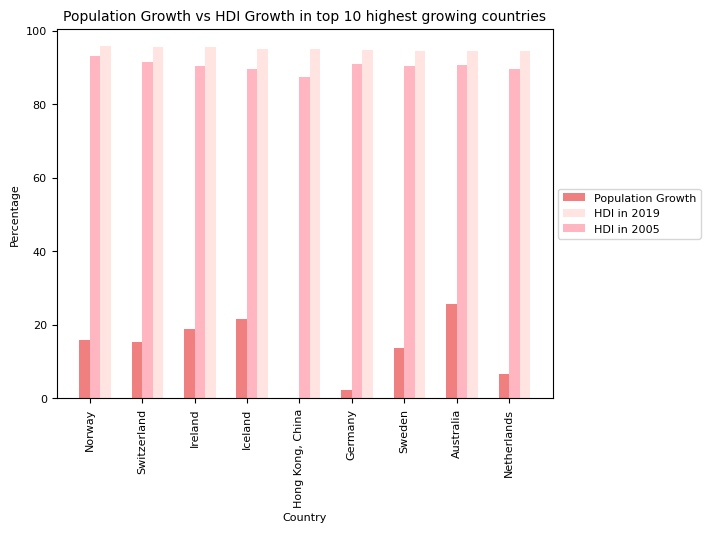

In [425]:
y = range(len(high_hdi['country']))
bar_width = 0.2

plt.bar(y, high_hdi['pop_growth'], width=bar_width, label='Population Growth', color='lightcoral')
plt.bar([i + bar_width*2 for i in y], high_hdi['2019']*100, width=bar_width, label='HDI in 2019', color='mistyrose')
plt.bar([i + bar_width for i in y], high_hdi['2005']*100, width=bar_width, label='HDI in 2005', color='lightpink')

plt.xticks([i + bar_width/2 for i in y], high_hdi['country'])

plt.xlabel('Country', fontsize=8)
plt.ylabel('Percentage', fontsize=8)
plt.title('Population Growth vs HDI Growth in top 10 highest growing countries', fontsize=10)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)